<a href="https://colab.research.google.com/github/EmileZounon/data_analytics_2/blob/main/Python/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [6]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape

(15414, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state and California state data for Covid 19

In [17]:
ny_df = df[df['state']=='New York']

In [21]:
cal_df = df[df['state']=='California']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [8]:
cal_df.head()

,date,state,fips,cases,deaths
5,2020-01-25,California,6,1,0
9,2020-01-26,California,6,2,0
13,2020-01-27,California,6,2,0
17,2020-01-28,California,6,2,0
21,2020-01-29,California,6,2,0


In [ ]:
ny_df.shape

(282, 5)

In [9]:
cal_df.shape

(358, 5)

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
15172,2020-12-03,New York,36,678869,34346
15227,2020-12-04,New York,36,690143,34409
15282,2020-12-05,New York,36,700902,34488
15337,2020-12-06,New York,36,710612,34552
15392,2020-12-07,New York,36,717930,34637


In [10]:
cal_df.tail()

,date,state,fips,cases,deaths
17343,2021-01-12,California,6,2815933,31105
17398,2021-01-13,California,6,2857587,31653
17453,2021-01-14,California,6,2898041,32239
17508,2021-01-15,California,6,2937376,32947
17563,2021-01-16,California,6,2974966,33393


In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [11]:
#first death in CAL
first_cal_death = cal_df[cal_df['deaths']!=0]
first_cal_death.head()

,date,state,fips,cases,deaths
285,2020-03-04,California,6,55,1
302,2020-03-05,California,6,67,1
323,2020-03-06,California,6,81,1
351,2020-03-07,California,6,100,1
384,2020-03-08,California,6,112,1


In [ ]:
#total number of cases
ny_df['cases'].max()

717930

In [12]:
cal_df['cases'].max()

2974966

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

105935210

Finding new covid 19 cases on daily basis (new cases added everyday)

In [24]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [26]:
newcase = []
previuos_case = 0
for index, row in cal_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [19]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
cal_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [28]:
cal_df.head(10)

,date,state,fips,cases,deaths,new_cases
5,2020-01-25,California,6,1,0,1
9,2020-01-26,California,6,2,0,1
13,2020-01-27,California,6,2,0,0
17,2020-01-28,California,6,2,0,0
21,2020-01-29,California,6,2,0,0
25,2020-01-30,California,6,2,0,0
29,2020-01-31,California,6,3,0,1
33,2020-02-01,California,6,3,0,0
38,2020-02-02,California,6,6,0,3
43,2020-02-03,California,6,6,0,0


In [ ]:
ny_df['new_cases'].sum()

717930

In [29]:
cal_df['new_cases'].sum()

2974966

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [30]:
cal_cases = cal_df['cases']
cal_deaths = cal_df['deaths']
cal_dates = cal_df['date']
cal_new_cases = cal_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

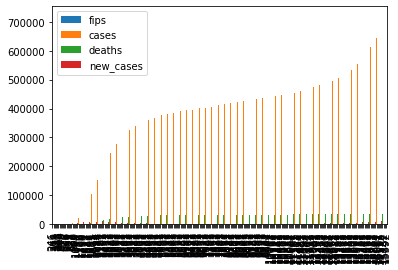

In [ ]:
ny_df.plot(kind='bar')

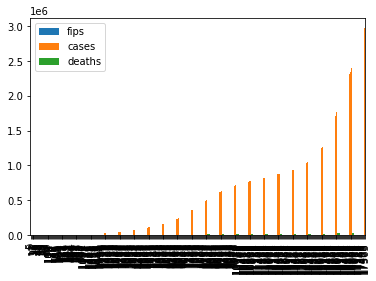

In [13]:
cal_df.plot(kind='bar')

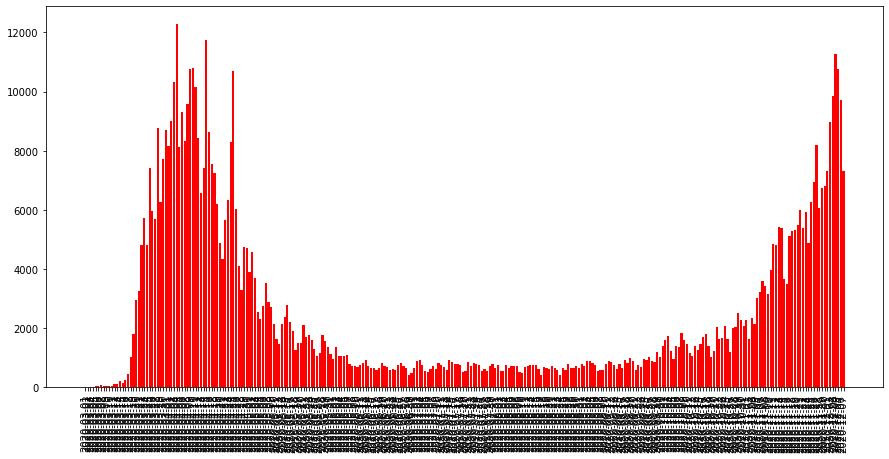

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

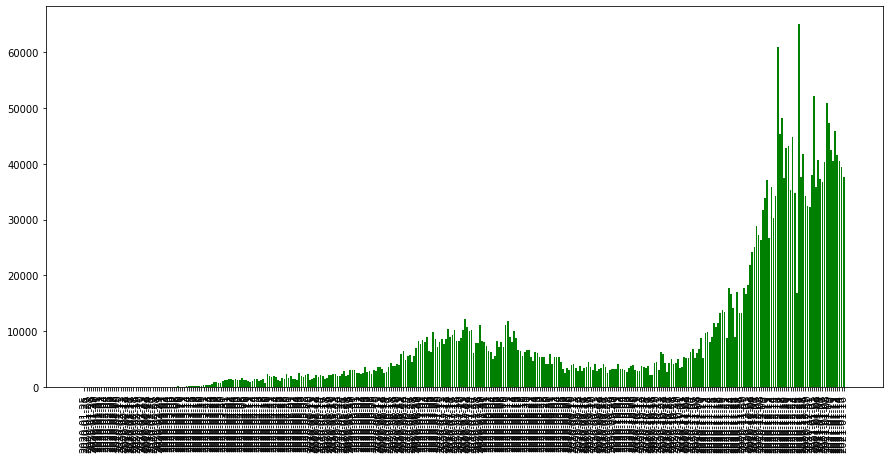

In [32]:
plt.figure(figsize=(15,7))
plt.bar(x=cal_dates, height=cal_new_cases, color='green')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [38]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

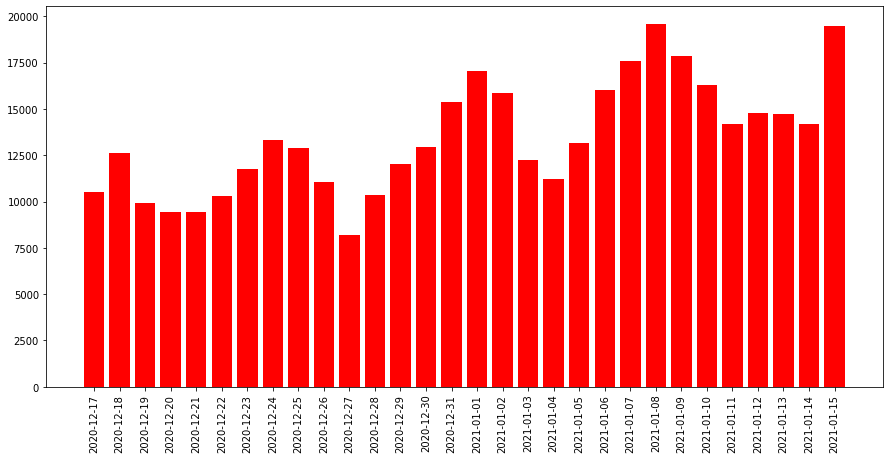

In [39]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

In [34]:
cal_cases_30 = cal_df['cases'][-31:-1]
cal_deaths_30 = cal_df['deaths'] [-31:-1]
cal_dates_30 = cal_df['date'][-31:-1]
cal_new_cases_30 = cal_df['new_cases'][-31:-1]

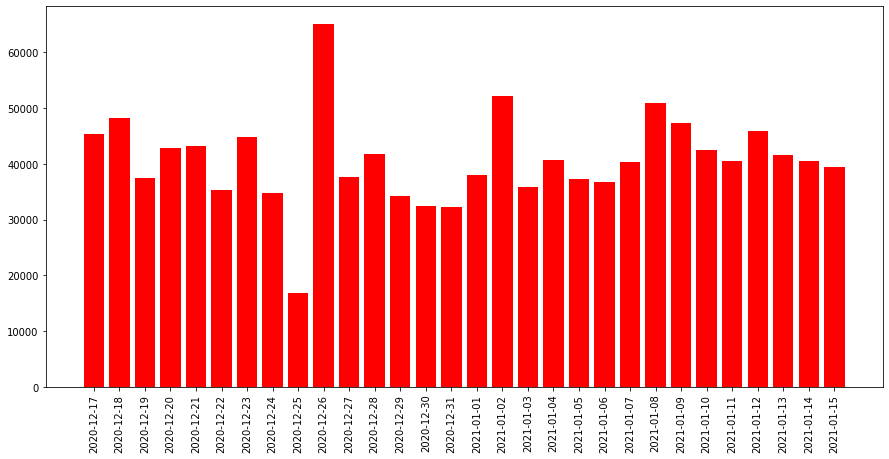

In [35]:
plt.figure(figsize=(15,7))
plt.bar(x=cal_dates_30, height=cal_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

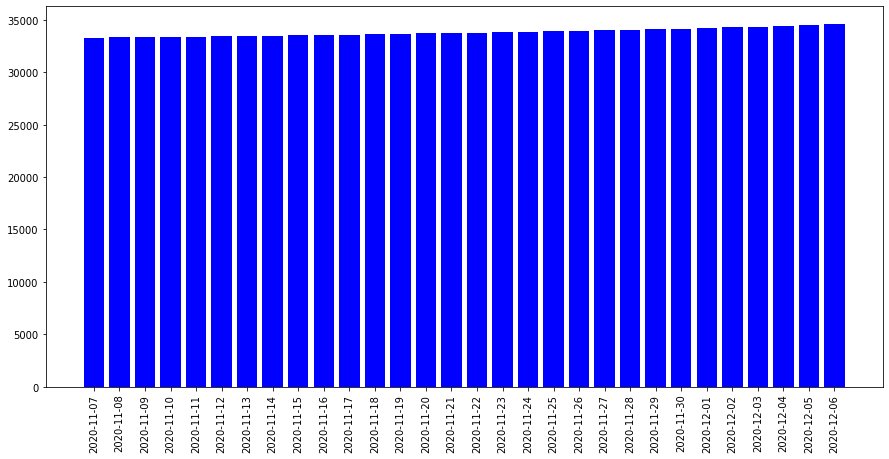

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

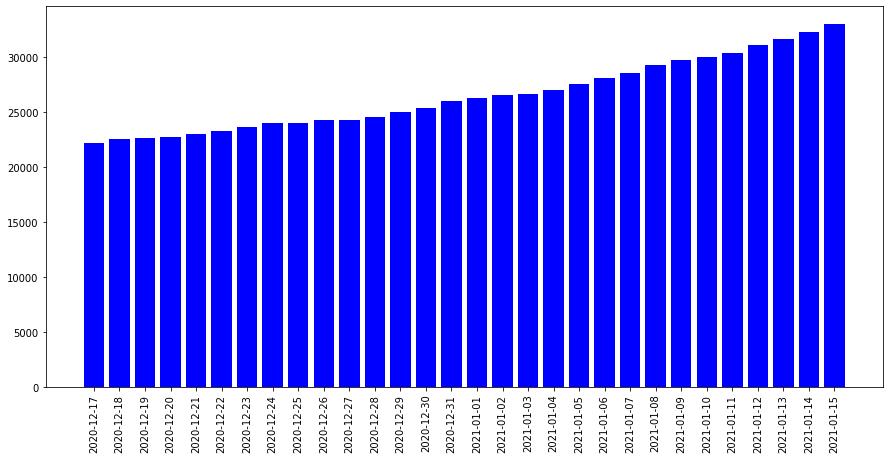

In [36]:
plt.figure(figsize=(15,7))
plt.bar(x=cal_dates_30, height=cal_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

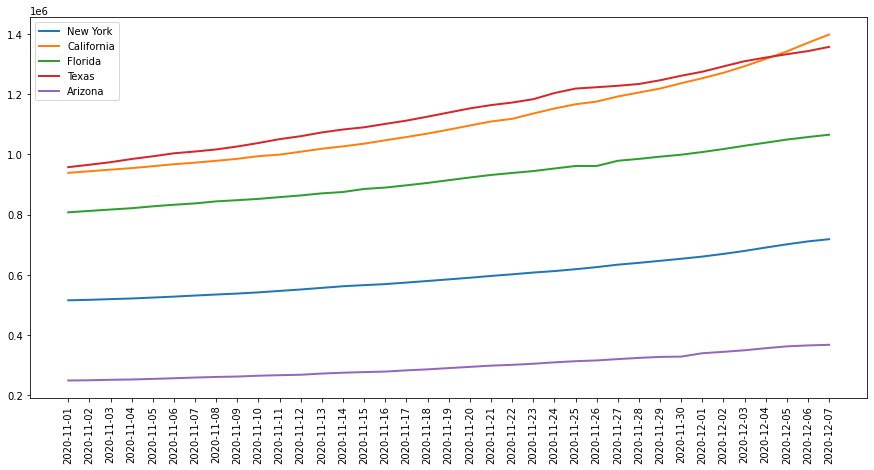

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --On January 12, California has most cases than New York.   However, the death toll in New York is higher than California.  
California has more cases than New York. 

   New York new cases 717.930. California new cases: 2.974.966.     California has more new cases than New York.

   From December 13, 2020 to January 11th 2021, New York has almost 39.588 deaths and California 31.105 deaths.

2.   Conclusion 2
     
     By analyzing the plotbar for ny_new_cases, it can be seen that the graph have two peaks at both ends. It shows a small peak during the initial months of 2020 and a higher peak at the end of 2020. The highest peak at the right end shows the spike in new cases during the festival season in New York. Also, the rate of new cases were very low during the summer, showing the result of lockdown and as a result of correctly following the CDC guidelines
By comparing covid 19 cases after July for states: New York had the highest number of cases until the end of July. From the beginning of August, cases in California, Florida, and Texas, surpassed cases in New York. The cases in Arizona never passed New York and shows a regular trend. During later months, California and Texas took the lead. From the first week of December, California showed an unusual spike in the cases and the trend continuous until today. 
This may be due to the increase in travel and indoor gatherings during the holiday season
